In [4]:
import math
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import json
from datetime import datetime
import time

def set_map_size(my_dpi):
    '''breates the map in the background. allows to determine dpi of the map'''
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

def create_map():
    '''creates the map'''
    m = Basemap(projection='mill',llcrnrlat=25.1,urcrnrlat=71.5,\
            llcrnrlon=-10.5,urcrnrlon=87.3,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
    m.drawmapboundary(fill_color='#FFFFFF')
    return m

def prepare_location_history(json_file):
    '''takes google location history and formats it so its data points can be evaluated'''
    # open and read json file into info:
    with open(json_file) as f:
        info = f.read()
    # reading the string into json and exstracting the actual location list (list contains dictionaries):
    info = json.loads(info)
    info = info["locations"] 
    return info

def check_json_file(info):
    '''gives info about the json file used. needs "info" as argument'''
    print("about to plot %s data points..." %len(info))
    timestamps = [d['timestampMs'] for d in info]
    print("the oldest timestamp is from:", datetime.fromtimestamp(int(min(timestamps)) / 1000))
    print("the newest timestamp is from:", datetime.fromtimestamp(int(max(timestamps)) / 1000))

def plot_points(m, info):
    '''needs "lats" and "lons" list that can be obtained from evaluate_data function'''
    lx = []
    ly = []
    ihi = []
    for point in info:
        x, y = m(point['longitudeE7'] / 10**7,point['latitudeE7'] / 10**7)
        lx.append(x)
        ly.append(y)
    m.plot(lx, ly, 3,marker='o',markersize=0.5, color='k')

    plt.title('Europe & parts of Asia, May to November 2018')
    return plt.show()

def calculate_distance(a, b):
    '''WORK IN PROGRESS. 
    calculates distance between two data points. (radiant format). only gives a rough estimate as shape of earth is 
    ignored. not suitable for proper geoanalysis, but serves the purpose of eradicating outlier data points in the map'''
    E7 = math.sqrt((a["latitudeE7"] - b["latitudeE7"])**2 + (a["longitudeE7"] - b["longitudeE7"])**2)
    return E7 / 10**7

about to plot 334259 data points...
the oldest timestamp is from: 2018-06-02 15:08:47.319000
the newest timestamp is from: 2018-10-27 09:23:30.073000


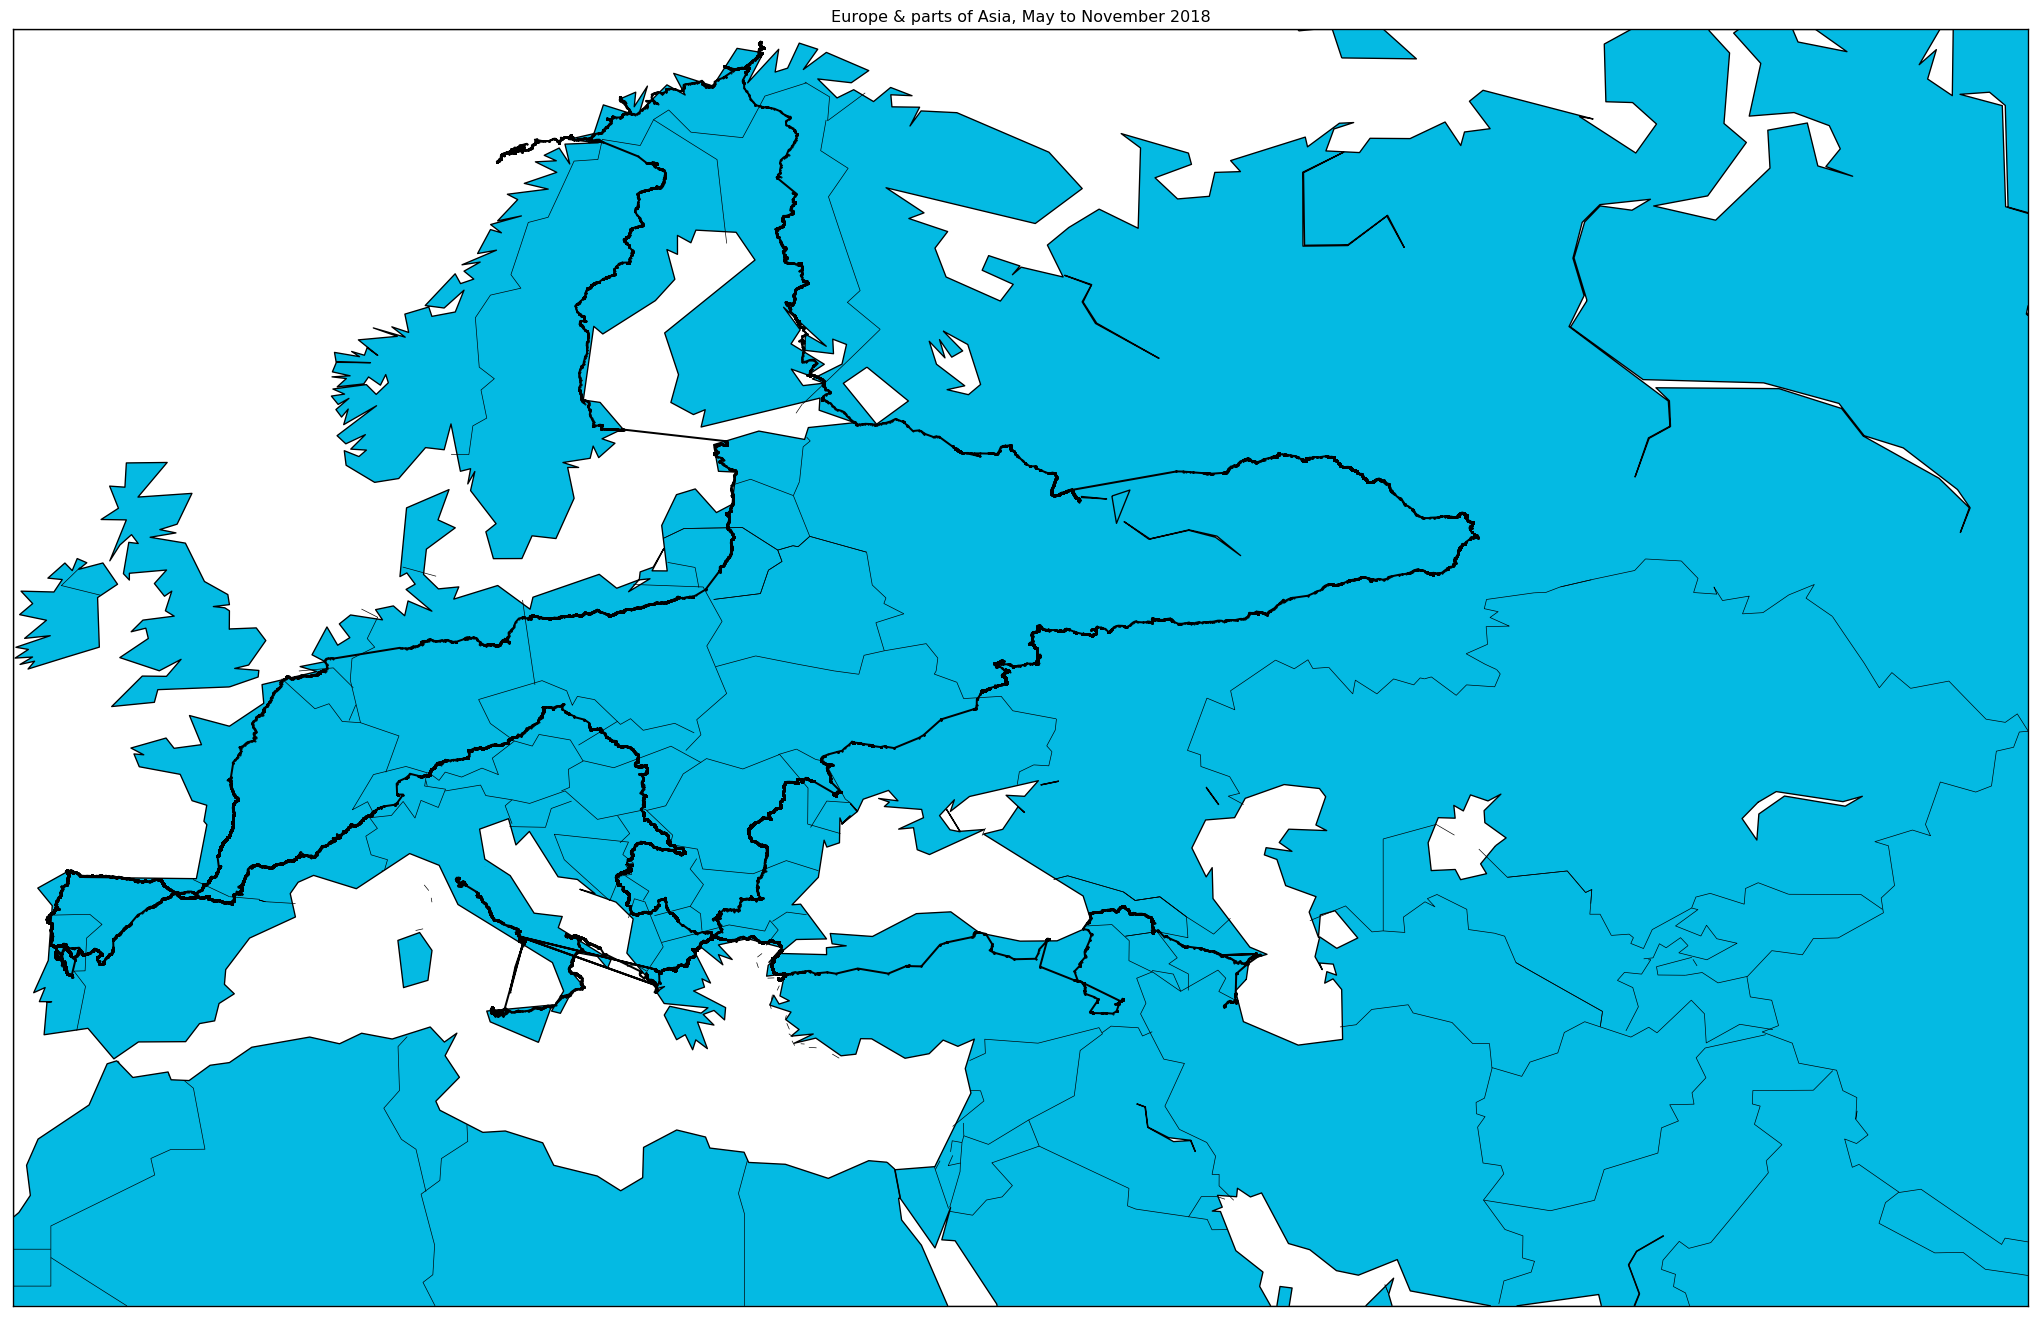

In [3]:
def plot_google_locations_on_world_map(json_file):
    '''does the plotting. needs all of the above functions and a json file as an argument'''
    info = prepare_location_history(json_file)
    check_json_file(info)
    set_map_size(96)
    m = create_map()
    plot_points(m, info)

plot_google_locations_on_world_map("Standortverlauf_m_iran.json")

# GRAPH THAT SHOWS ALTITUDE OVER TIME

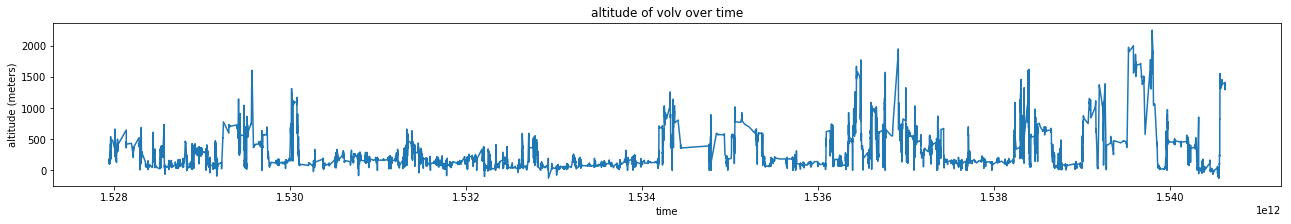

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# lowest point that can potentially be reached (caspian depression, kazakhstan)
min_alt = -138 

timestamps = np.array([int(d['timestampMs']) for d in info if "altitude" in d if d['altitude'] > min_alt])
altitudes = np.array([d['altitude'] for d in info if "altitude" in d if d['altitude'] > min_alt]) # y-achse

fig, ax = plt.subplots()
fig.set_size_inches(22,3)
ax.set(xlabel='time', ylabel='altitude (meters)',
       title='altitude of volv over time')

plt.plot(timestamps, altitudes) # x, y